# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt


from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [ ]:
for root, dirs, files in os.walk("..", topdown=False):
    print( f'root = {root}, dirs = {dirs}, files = {files} \n')

In [8]:
for root, dirs, files in os.walk(".", topdown=True):
    print( f'root = {root}, dirs = {dirs}, files = {files} \n')

root = ., dirs = ['.ipynb_checkpoints'], files = ['D057B1N6_logbook.ipynb', 'D057B1N7_logbook.ipynb', 'D057B1N8_logbook.ipynb', 'D057B1N9_logbook.ipynb'] 

root = .\.ipynb_checkpoints, dirs = [], files = ['D057B1N6_logbook-checkpoint.ipynb', 'D057B1N7_logbook-checkpoint.ipynb', 'D057B1N8_logbook-checkpoint.ipynb', 'D057B1N9_logbook-checkpoint.ipynb'] 



### Database ini

In [4]:
SAMPLE = 'D057B1N6'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

# Import from origin

In [5]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


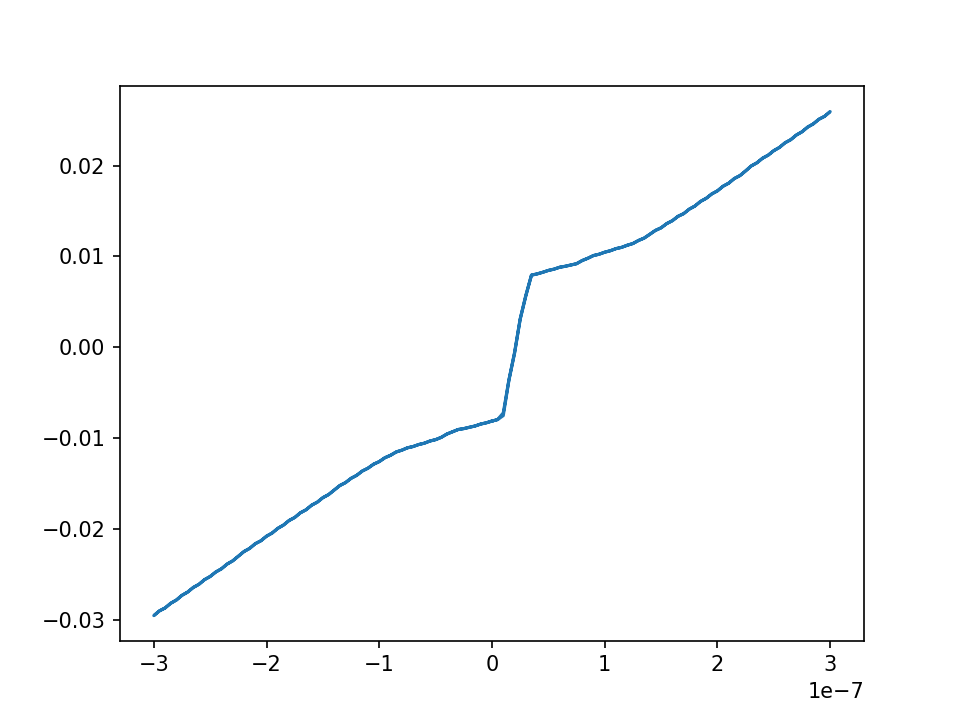

In [8]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [9]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC coarse')

Starting experimental run with id: 2


# Report

## Overview IVC

<IPython.core.display.Javascript object>


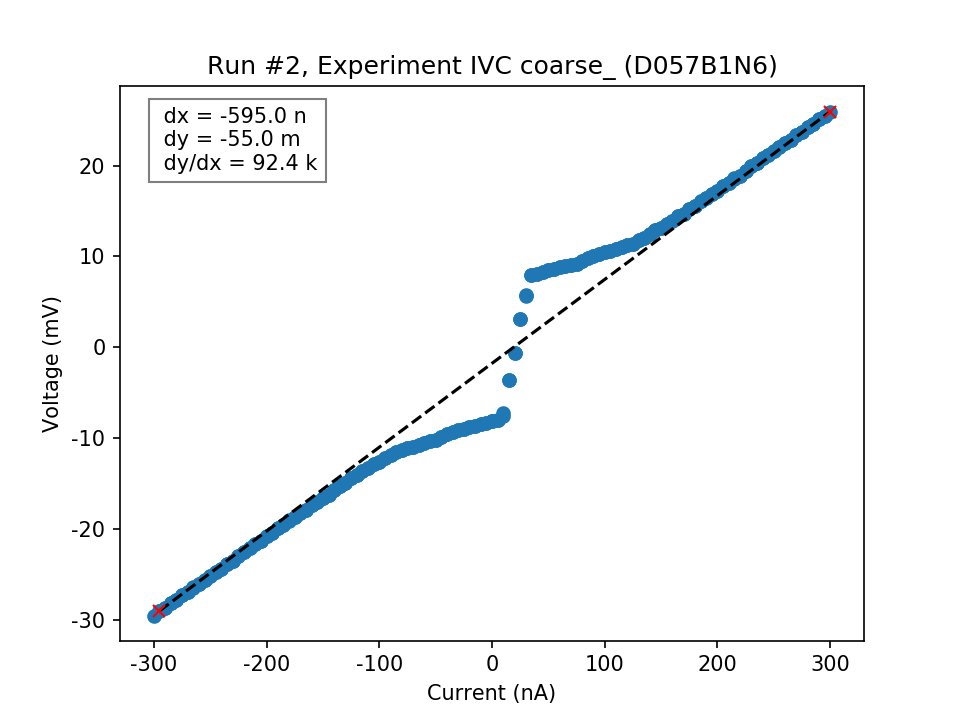

In [10]:
pbi(2, interactive = True)

In [11]:
Vg = 8.86e-3
Rn_tot = 92.4e3

## IVC fine scan

<IPython.core.display.Javascript object>


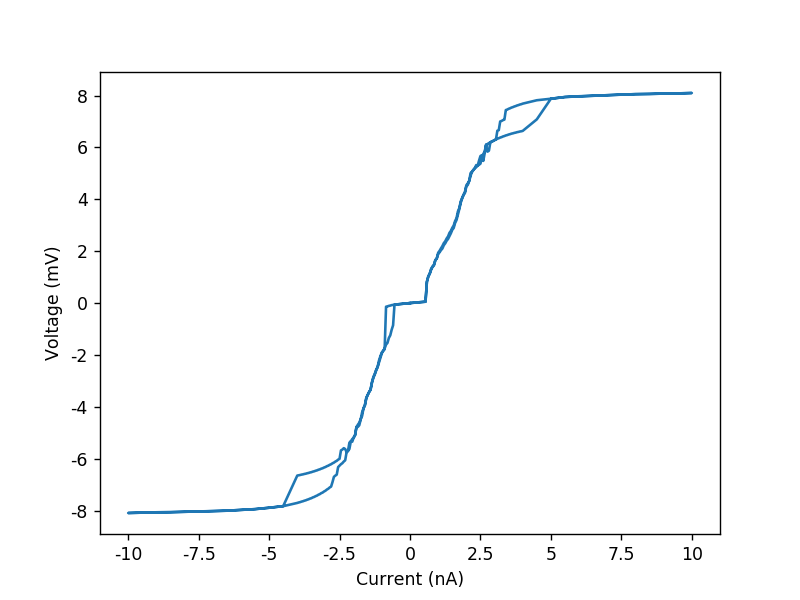

([<matplotlib.axes._subplots.AxesSubplot at 0x2b0fc6d9630>], [None])

In [5]:
plot_by_id(1)

In [13]:
Ro_tot = 114.5
Isw = 70e-9
N  = 30
Vo_tot = 96.8e-6

# Datatable update

In [17]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp


In [18]:
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : Rn_tot,
               'Ro_tot'  : Ro_tot,
               'Isw'     : Isw,
               'N'       : N,
               'Vo_tot'  : Vo_tot,
               'Npar'    : 2,
               'dsgn'    : 'Fin',
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D057B1N6,40.0f,185.9m,2.2,92.3n,70.0n,30.0,2.0,3.1k,92.4k,3.8,NaN,114.5,96.8u,Fin,measd_lv,1.8


In [19]:
ft.to_excel("..\chain table.xlsx")
ft = pd.read_excel("..\chain table.xlsx", index_col = 0)
show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D057B1N6,40.0f,185.9m,2.2,92.3n,70.0n,30,2,3.1k,92400,3.8,NaN,114.5,96.8u,Fin,measd_lv,1.8
